In [1]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
import networkx as nx
import queue

In [2]:
# design for our river bank and positions of fwgc
def print_wgc_design(state):
    side_names = ['Left', 'Right']
    object_names = ['Farmer', 'Wolf', 'Goat', 'Cabbage']
    
    # Print the left bank
    print(" " * 10 + "==== Left Bank ====")
    for obj in range(4):
        if state[obj] == 0:
            print("| {:<8}".format(object_names[obj]), end='')
        else:
            print("| {:<8}".format(''), end='')
    print("|")
    
    # Print the river
    print("=" * 70)
    #print('\n')
    print( " " * 15 + "    /|b\\")
    print( " " * 15 + "   / |o \\")
    print( " " * 15 + "   \\ |a /")
    print( " " * 15 + "    \\|t/")
    print("=" * 70)
    
    # Print the right bank
    print(" " * 10 + "==== Right Bank ====")
    for obj in range(4):
        if state[obj] == 1:
            print("| {:<8}".format(object_names[obj]), end='')
        else:
            print("| {:<8}".format(''), end='')
    print("|")
    print("\n\n")
    print("----+---+----+----+---+----+----+----+----+---+----+----+---+----+----")

initialstate = (0, 0, 0, 0)  
print_wgc_design(initialstate)

          ==== Left Bank ====
| Farmer  | Wolf    | Goat    | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
|         |         |         |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----


In [3]:
# Create a Graph class
class graph(object):
    ''' Class to represent a Graph
        Construction : Using Edges
    '''
    def __init__(self):
        self.edges = {}
    
    def all_edges(self):
        return self.edges
    
    def neighbors(self, node):
            return self.edges[node]
        
    def __init__(self):
        self.edges = {}

    def add_edge(self, node, neighbor, weight):
        if node not in self.edges:
            self.edges[node] = []
        self.edges[node].append((neighbor, weight))

    def get_edges(self):
        return self.edges

In [4]:
# state order is as follows: (farmer, wolf, goat, cabbage)
grid = [[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 1, 0), (0, 0, 1, 1)],
        [(0, 1, 0, 0), (0, 1, 0, 1), (0, 1, 1, 0), (0, 1, 1, 1)],
        [(1, 0, 0, 0), (1, 0, 0, 1), (1, 0, 1, 0), (1, 0, 1, 1)],
        [(1, 1, 0, 0), (1, 1, 0, 1), (1, 1, 1, 0), (1, 1, 1, 1)]]

In [5]:
def change_state(t1, t2):
    count = sum(1 for a, b in zip(t1, t2) if a != b)
    return count 

def valid_crossing(state, move):
    farmer1, wolf1, goat1, cabbage1 = state
    farmer2, wolf2, goat2, cabbage2 = move
    if (wolf1 != wolf2):
        if (wolf1 != farmer1):
            return 0
        else:
            return 1
    elif (goat1 != goat2):
        if (goat1 != farmer1):
            return 0
        else:
            return 1
    elif (cabbage1 != cabbage2):
        if (cabbage1 != farmer1):
            return 0
        else:
            return 1
    elif (wolf1 == wolf2 and goat1 == goat2 and cabbage1 == cabbage2):
        return 2
    else:
        return 0
    
# check all potential states for possible moves and its cost
def states_to_graph(grid):
    ''' Display a graph using networkx
        Input : Graph from 2D maze
        Output : Input graph displayed
    '''
    wgc = graph()
    
    # weight_farmer = 5.6
    weight_wolf = 3.0
    weight_goat = 2.5
    weight_farmer = 5.6
    weight_cabbage = 0.1
    
    for i in range(4):
        for j in range(4):
            neighbors = []
            
            state = grid[i][j]
            for x in range(4):
                for y in range(4):
                    check = grid[x][y]
                    weight = 0
                    # the farmer has to cross every move regardless
                    if (state[0] == check[0]):
                        continue;
                    # if there is a change in wolf, goat or cabbage
                    if (change_state(state, check) == 2 and valid_crossing(state, check) == 1):
                        # these are the constraints that cannot happen
                        if (check == (0, 1, 1, 0) or check == (0, 0, 1, 1) or check == (1, 0, 0, 1) or check == (1, 1, 0, 0)) or check == (1, 0, 0, 0) or check == (0, 1, 1, 1):
                            neighbors.append((check, float('inf')))
                        else:
                            if (state[1] != check[1]):
                                weight = weight_farmer + weight_wolf
                                neighbors.append((check, weight))
                            elif (state[2] != check[2]):
                                weight = weight_farmer + weight_goat
                                neighbors.append((check, weight))
                            elif (state[3] != check[3]):
                                weight = round(weight_farmer + weight_cabbage, 1)
                                neighbors.append((check, weight))
                            else:
                                continue
                    # if farmer returns alone
                    elif (valid_crossing(state, check) == 2):
                        if (check == (0, 1, 1, 0) or check == (0, 0, 1, 1) or check == (1, 0, 0, 1) or check == (1, 1, 0, 0)) or check == (1, 0, 0, 0) or check == (0, 1, 1, 1):
                            neighbors.append((check, float('inf')))
                        else:
                            neighbors.append((check, weight_farmer))
                    else:
                        continue
                        
            # Insert edges in the graph
            if len(neighbors) >= 0:
                if (state != (0, 1, 1, 0) and state != (0, 0, 1, 1) and state != (1, 0, 0, 1) and state != (1, 1, 0, 0) and state != (1, 0, 0, 0) and state != (0, 1, 1, 1)):
                    wgc.edges[state] = neighbors
                else:
                    wgc.edges[state] = []

    return wgc

In [6]:
wgcgraph = states_to_graph(grid)

wgcgraph.all_edges()

{(0, 0, 0, 0): [((1, 0, 0, 0), inf),
  ((1, 0, 0, 1), inf),
  ((1, 0, 1, 0), 8.1),
  ((1, 1, 0, 0), inf)],
 (0, 0, 0, 1): [((1, 0, 0, 1), inf), ((1, 0, 1, 1), 8.1), ((1, 1, 0, 1), 8.6)],
 (0, 0, 1, 0): [((1, 0, 1, 0), 5.6), ((1, 0, 1, 1), 5.7), ((1, 1, 1, 0), 8.6)],
 (0, 0, 1, 1): [],
 (0, 1, 0, 0): [((1, 1, 0, 0), inf), ((1, 1, 0, 1), 5.7), ((1, 1, 1, 0), 8.1)],
 (0, 1, 0, 1): [((1, 1, 0, 1), 5.6), ((1, 1, 1, 1), 8.1)],
 (0, 1, 1, 0): [],
 (0, 1, 1, 1): [],
 (1, 0, 0, 0): [],
 (1, 0, 0, 1): [],
 (1, 0, 1, 0): [((0, 0, 0, 0), 8.1), ((0, 0, 1, 0), 5.6)],
 (1, 0, 1, 1): [((0, 0, 0, 1), 8.1), ((0, 0, 1, 0), 5.7), ((0, 0, 1, 1), inf)],
 (1, 1, 0, 0): [],
 (1, 1, 0, 1): [((0, 0, 0, 1), 8.6), ((0, 1, 0, 0), 5.7), ((0, 1, 0, 1), 5.6)],
 (1, 1, 1, 0): [((0, 0, 1, 0), 8.6), ((0, 1, 0, 0), 8.1), ((0, 1, 1, 0), inf)],
 (1, 1, 1, 1): [((0, 0, 1, 1), inf),
  ((0, 1, 0, 1), 8.1),
  ((0, 1, 1, 0), inf),
  ((0, 1, 1, 1), inf)]}

In [7]:
# Helper functions to display a Graph
def showbinarywgcgraph(graph):
    edgeDict = graph.all_edges()
    edgeList = []
    for node in edgeDict:
        if edgeDict[node] is not None:
            for neighbor, weight in edgeDict[node]:
                edgeList.append((node,neighbor, {'weight': 1}))

    G = nx.Graph()
    G.add_edges_from(edgeList)

    f = plt.figure(figsize = (40,40))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 9000)
    nx.draw_networkx_edges(G, pos, width = 3)
    nx.draw_networkx_labels(G, pos, font_size = 20)

    plt.axis("off")
    plt.show()


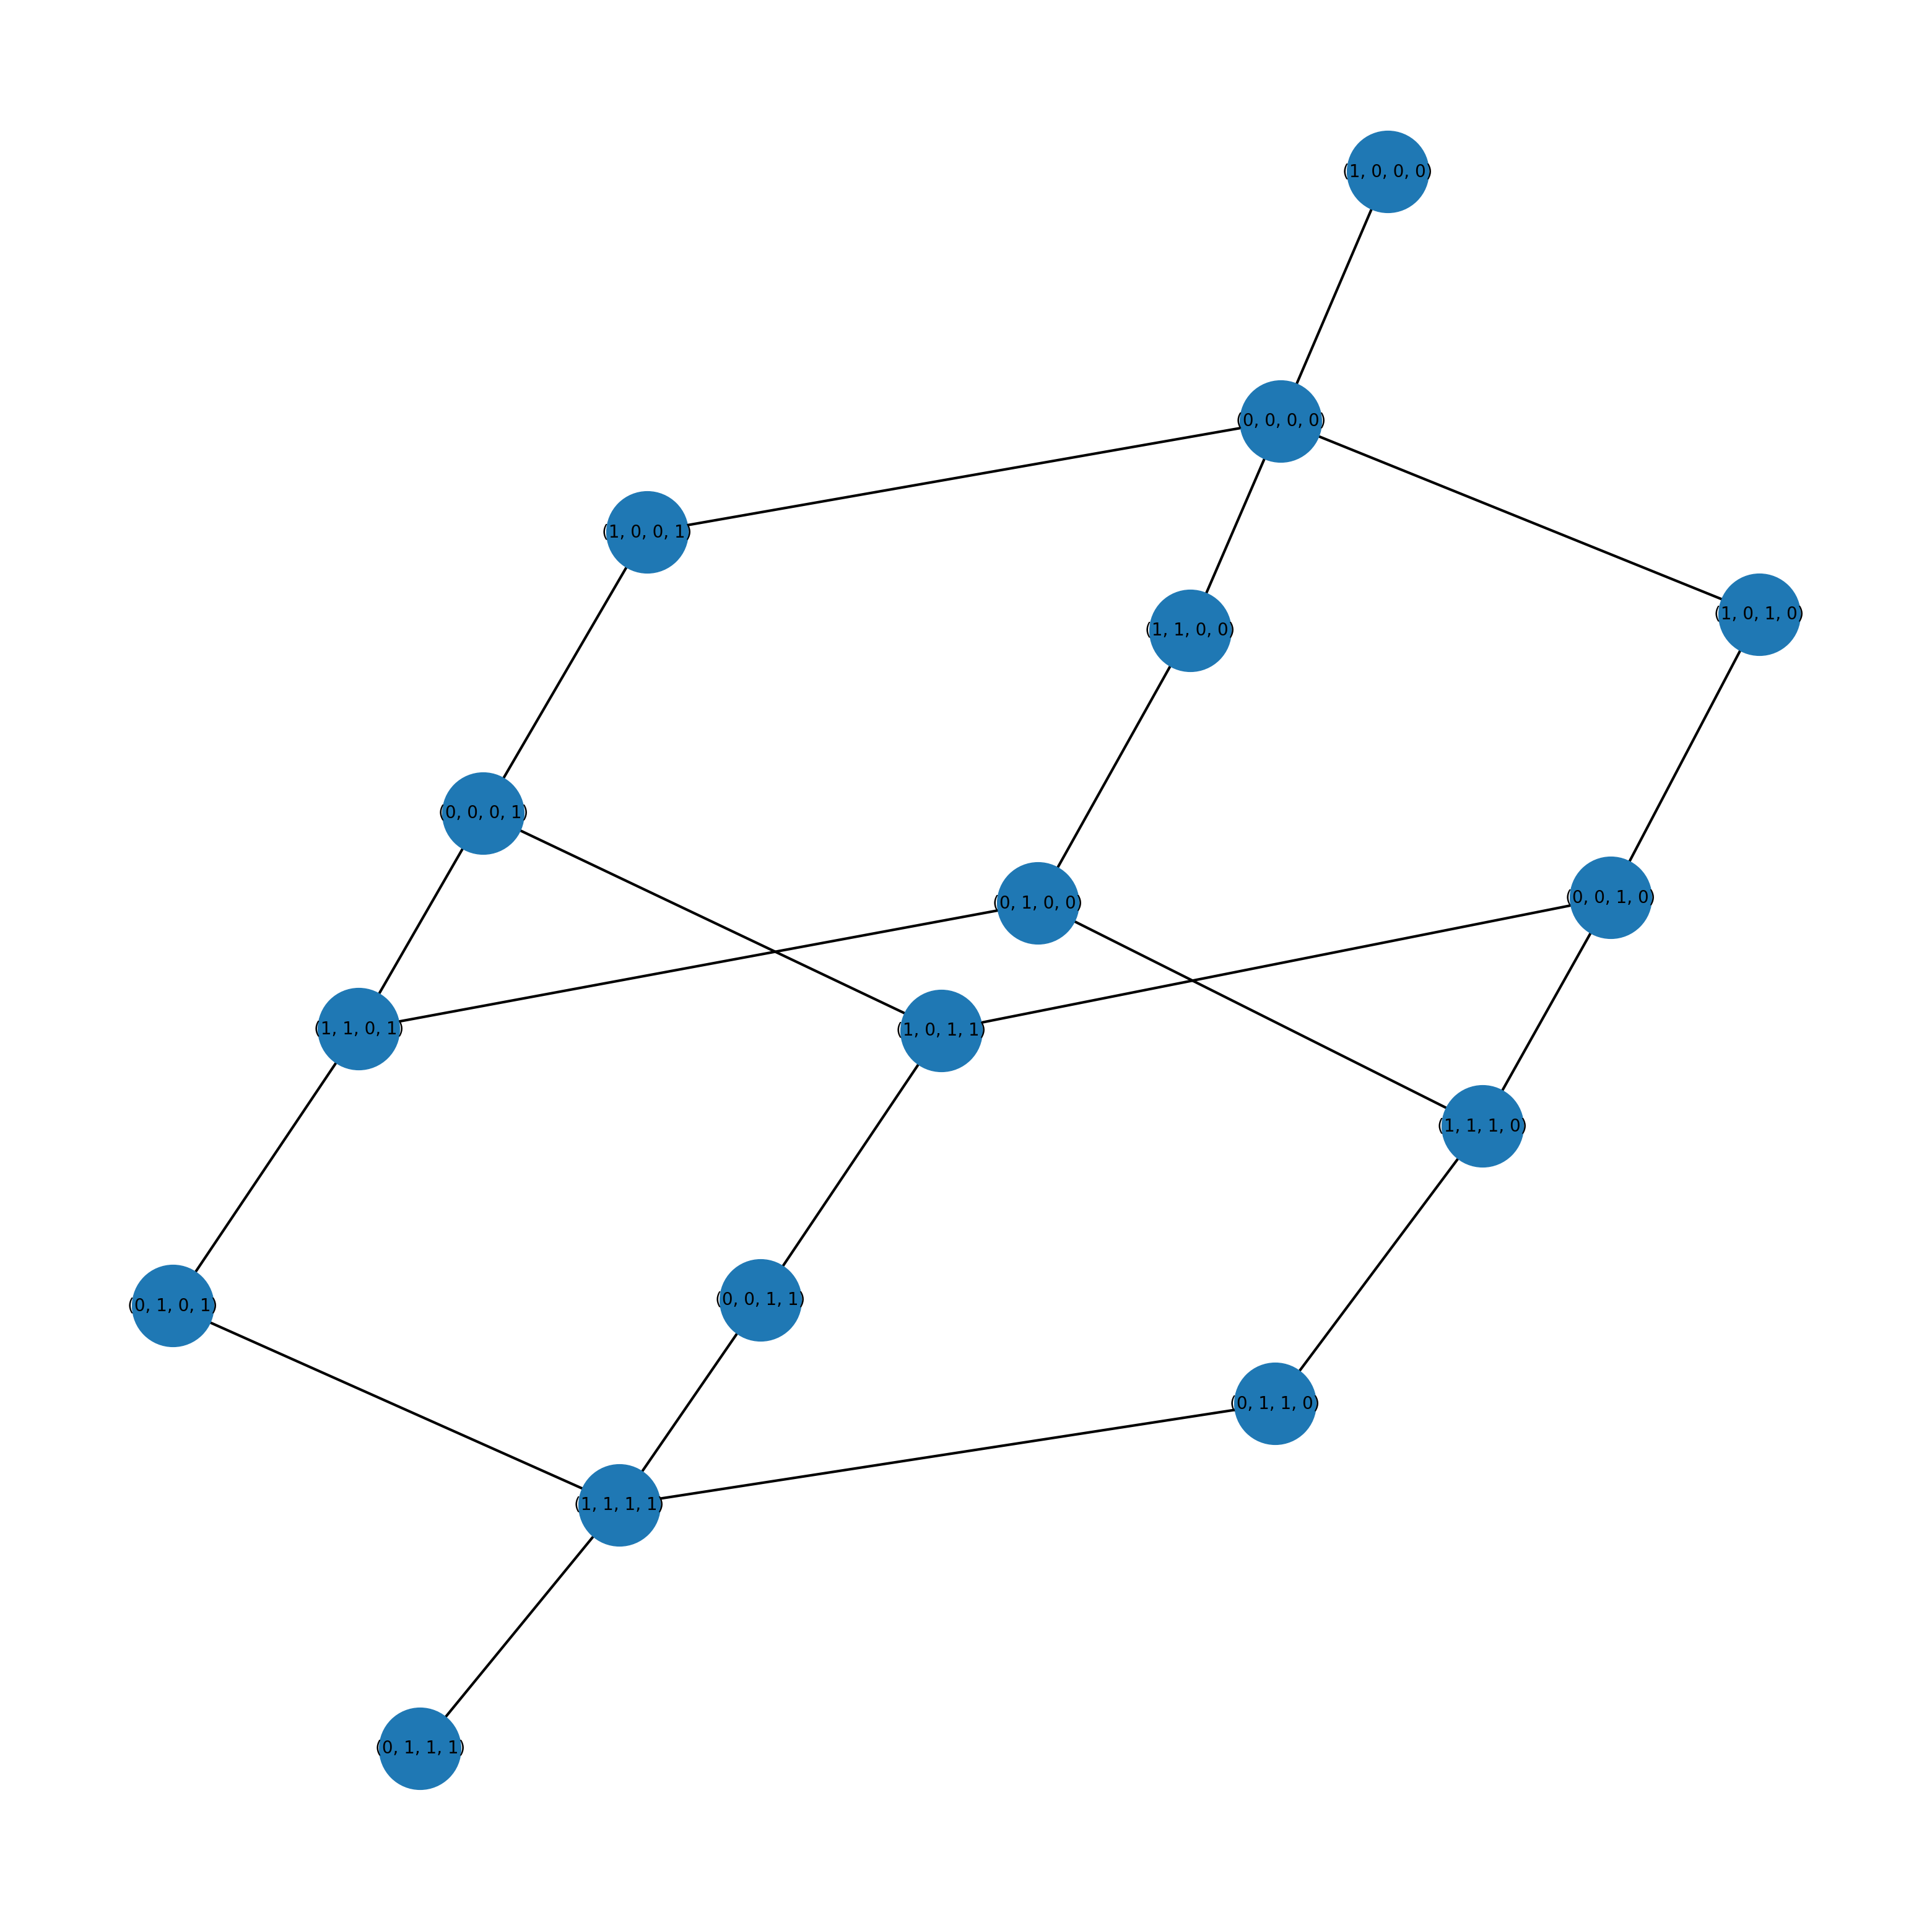

In [8]:
showbinarywgcgraph(wgcgraph)

In [9]:
def breadth_first_search(graph, start, goal):
    ''' Function to perform BFS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.Queue()    # FIFO Queue for Frontier
    
    # initialization
    frontier.put(start)         # Add the start node to frontier
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in graph.neighbors(currentNode):
           
            # ignore if it has already been explored
            if nextNode not in explored:
                # check for the cost of the node
                if nextNode not in explored and weight != float('inf'):
                        
                    # put new node in frontier
                    frontier.put(nextNode)

                    # assign current node as parent
                    explored[nextNode] = currentNode
    
    return explored, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

In [10]:
# Define start and goal positions
START = (0, 0, 0, 0)
GOAL = (1, 1, 1, 1)

# Run the BFS algorithm for path finding
nodesExplored, nodesProcessed = breadth_first_search(wgcgraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Breadth-First-Search (BFS)")
print()

totalNodes = len(grid)*len(grid[0])
print("Total nodes in maze :", totalNodes)
# prints the number of nodes processed and its percentage relative to total no. of nodes
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%") 
print("Final path nodes traversed :", len(path))
print()
print("Farmer's guide to cross the river :", path)
print("\n")
count = 1
for i in path:
    print("State: {}.\nMove: {}\n" .format(i, count))
    print_wgc_design(i)
    print("\n\n")
    count += 1

Breadth-First-Search (BFS)

Total nodes in maze : 16
Total nodes visited : 10  |  62.5 %
Final path nodes traversed : 8

Farmer's guide to cross the river : [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0), (1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 0, 1), (0, 1, 0, 1), (1, 1, 1, 1)]


State: (0, 0, 0, 0).
Move: 1

          ==== Left Bank ====
| Farmer  | Wolf    | Goat    | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
|         |         |         |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----



State: (1, 0, 1, 0).
Move: 2

          ==== Left Bank ====
|         | Wolf    |         | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
| Farmer  |         | Goat    |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----



State: (0, 0, 1, 0).
Move: 3

In [11]:
def depth_first_search(graph, start, goal):
    ''' Function to perform DFS to find path in a graph
        Input  : Graph with the start and goal vertices, depth limit
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.LifoQueue()      # LIFO Queue for Frontier
    
    # initialization
    processed = 0                     # Count of total nodes processed
    frontier.put(start)          # Add the start node and depth 0 to frontier
    processed += 1
    explored = {}                     # Dict of explored nodes {node : parentNode}
    explored[start] = None            # start node has no parent node

    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()
        frontier.put(currentNode)
        found = 0
        # stop when goal is reached or depth limit is exceeded
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in graph.neighbors(currentNode):
            # ignore if it has already been explored and not exceeding depth limit
            if nextNode not in explored and weight != float('inf'):
                # put new node in frontier with its depth incremented by 1
                frontier.put(nextNode)
                processed += 1
                found = 1
                # assign current node as parent
                explored[nextNode] = currentNode
                break
        if found == 0:
            currentNode = frontier.get()
            
    return explored, processed

# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

In [12]:
# Define start and goal positions
START = (0, 0, 0, 0)
GOAL = (1, 1, 1, 1)

# Run the DFS algorithm for path finding
nodesExplored, nodesProcessed = depth_first_search(wgcgraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Depth-First-Search (DFS)")
print()

totalNodes = len(grid)*len(grid[0])
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path nodes traversed :", len(path))
print()
print("Farmer's guide to cross the river :", path)
print("\n")

count = 1
for i in path:
    print("State: {}.\nMove: {}\n" .format(i, count))
    print_wgc_design(i)
    print("\n\n")
    count += 1

Depth-First-Search (DFS)

Total nodes in maze : 16
Total nodes visited : 10  |  62.5 %
Final path nodes traversed : 8

Farmer's guide to cross the river : [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0), (1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 0, 1), (0, 1, 0, 1), (1, 1, 1, 1)]


State: (0, 0, 0, 0).
Move: 1

          ==== Left Bank ====
| Farmer  | Wolf    | Goat    | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
|         |         |         |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----



State: (1, 0, 1, 0).
Move: 2

          ==== Left Bank ====
|         | Wolf    |         | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
| Farmer  |         | Goat    |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----



State: (0, 0, 1, 0).
Move: 3



In [13]:
def depth_limited_search(graph, start, goal, depth):
    ''' Function to perform DLS to find path in a graph
        Input  : Graph with the start and goal vertices, depth limit
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.LifoQueue()      # LIFO Queue for Frontier
    
    # initialization
    processed = 0                     # Count of total nodes processed
    frontier.put((start, 0))          # Add the start node and depth 0 to frontier
    processed += 1
    explored = {}                     # Dict of explored nodes {node : parentNode}
    explored[start] = None            # start node has no parent node

    
    while not frontier.empty():
        # get next node from frontier
        currentNode, currentDepth = frontier.get()
        frontier.put((currentNode, currentDepth))
        found = 0
        # stop when goal is reached or depth limit is exceeded
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in graph.neighbors(currentNode):
            # ignore if it has already been explored and not exceeding depth limit
            if nextNode not in explored and weight != float('inf') and currentDepth < depth:
                # put new node in frontier with its depth incremented by 1
                frontier.put((nextNode, currentDepth + 1))
                processed += 1
                found = 1
                # assign current node as parent
                explored[nextNode] = currentNode
                break
        if found == 0:
            currentNode, currentDepth = frontier.get()
            
    return explored, processed

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        if (currentNode not in explored):
            return None
        else:
            currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

In [14]:
# Define start and goal positions
START = (0, 0, 0, 0)
GOAL = (1, 1, 1, 1)

# Run the DLS algorithm for path finding, with specified depth of search
nodesExplored, nodesProcessed = depth_limited_search(wgcgraph, start = START, goal = GOAL, depth = 7)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Depth-Limited-Search (DLS)")
print()

if path is not None:
    totalNodes = len(grid)*len(grid[0])
    print("Total nodes in maze :", totalNodes)
    print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
    print("Final path nodes traversed :", len(path))
    print()
    print("Farmer's guide to cross the river :", path)
    print("\n")
    count = 1
    for i in path:
        print("State: {}.\nMove: {}\n" .format(i, count))
        print_wgc_design(i)
        print("\n\n")
        count += 1
else:
    totalNodes = len(grid)*len(grid[0])
    print("Total nodes in maze :", totalNodes)
    print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
    failed_explore = list(nodesExplored.keys())
    print("Farmer shall not cross :", failed_explore)

Depth-Limited-Search (DLS)

Total nodes in maze : 16
Total nodes visited : 10  |  62.5 %
Final path nodes traversed : 8

Farmer's guide to cross the river : [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0), (1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 0, 1), (0, 1, 0, 1), (1, 1, 1, 1)]


State: (0, 0, 0, 0).
Move: 1

          ==== Left Bank ====
| Farmer  | Wolf    | Goat    | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
|         |         |         |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----



State: (1, 0, 1, 0).
Move: 2

          ==== Left Bank ====
|         | Wolf    |         | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
| Farmer  |         | Goat    |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----



State: (0, 0, 1, 0).
Move: 3

Iterative Deepening Search (IDS) // Uninformed Search //  Non-Challenge Task

In [15]:
def iterative_deepening_search(graph, start, goal, depth):
    ''' Function to perform IDS to find path in a graph
        Input  : Graph with the start and goal vertices, depth limit
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.LifoQueue()      # LIFO Queue for Frontier
    
    # initialization
    processed = 0                     # Count of total nodes processed
    frontier.put((start, 0))          # Add the start node and depth 0 to frontier
    processed += 1
    explored = {}                     # Dict of explored nodes {node : parentNode}
    explored[start] = None            # start node has no parent node

    
    while not frontier.empty():
        # get next node from frontier
        currentNode, currentDepth = frontier.get()
        frontier.put((currentNode, currentDepth))
        found = 0
        # stop when goal is reached or depth limit is exceeded
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in graph.neighbors(currentNode):
            # ignore if it has already been explored and not exceeding depth limit
            if nextNode not in explored and weight != float('inf') and currentDepth < depth:
                # put new node in frontier with its depth incremented by 1
                frontier.put((nextNode, currentDepth + 1))
                processed += 1
                found = 1
                # assign current node as parent
                explored[nextNode] = currentNode
                break
        if found == 0:
            currentNode, currentDepth = frontier.get()
            
    return explored, processed

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        if (currentNode not in explored):
            return None
        else:
            currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

In [16]:
# Define start and goal positions
START = (0, 0, 0, 0)
GOAL = (1, 1, 1, 1)

print("Iterative Deepening Search (IDS)")
print()
for i in range(1,16):
    # Run the DLS algorithm for path finding, with specified depth of search
    nodesExplored, nodesProcessed = depth_limited_search(wgcgraph, start = START, goal = GOAL, depth = i)
    path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

    # Basic measures for the algorithm

    print("Current Depth Limit :", i)
    if path is not None:
        totalNodes = len(grid)*len(grid[0])
        print("Total nodes in maze :", totalNodes)
        print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
        print("Final path nodes traversed :", len(path))
        print()
        print("Farmer's guide to cross the river :", path)
        print()
        break
    else:
        totalNodes = len(grid)*len(grid[0])
        print("Total nodes in maze :", totalNodes)
        print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
        failed_explore = list(nodesExplored.keys())
        print("Farmer shall not cross :", failed_explore)
        print()

Iterative Deepening Search (IDS)

Current Depth Limit : 1
Total nodes in maze : 16
Total nodes visited : 2  |  12.5 %
Farmer shall not cross : [(0, 0, 0, 0), (1, 0, 1, 0)]

Current Depth Limit : 2
Total nodes in maze : 16
Total nodes visited : 3  |  18.75 %
Farmer shall not cross : [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0)]

Current Depth Limit : 3
Total nodes in maze : 16
Total nodes visited : 5  |  31.25 %
Farmer shall not cross : [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0), (1, 0, 1, 1), (1, 1, 1, 0)]

Current Depth Limit : 4
Total nodes in maze : 16
Total nodes visited : 7  |  43.75 %
Farmer shall not cross : [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0), (1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 1, 0), (0, 1, 0, 0)]

Current Depth Limit : 5
Total nodes in maze : 16
Total nodes visited : 8  |  50.0 %
Farmer shall not cross : [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0), (1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 0, 1), (1, 1, 1, 0), (0, 1, 0, 0)]

Current Depth Limit : 6
Total nodes in maze : 16
Total nod

In [17]:
# Uniform-Cost-Search (UCS) with Priority Queue

def uniform_cost_search(graph, start, goal):
    ''' Function to perform UCS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    
    # initialization
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()[1]
        processed += 1

        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in graph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node
            newcost = pathcost[currentNode] + weight

            # consider if not yet explored or if the new cost is lower 
            if (nextNode not in explored) or (newcost < pathcost[nextNode]):

                # set priority as newcost 
                priority = newcost
                
                # put new node in frontier with priority
                frontier.put((priority, nextNode))
                
                # assign current node as parent
                explored[nextNode] = currentNode
                
                # keep track of the updated path cost
                pathcost[nextNode] = newcost
    
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

In [18]:
# Define start and goal positions
START = (0, 0, 0, 0)
GOAL = (1, 1, 1, 1)

# Run the UCS algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = uniform_cost_search(wgcgraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Uniform-Cost-Search (UCS)")
print()

totalNodes = len(grid)*len(grid[0])
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path nodes traversed :", len(path))
print()
print("Farmer's guide to cross the river :", path)
print("\n")

count = 1
for i in path:
    print("State: {}.\nMove: {}\n" .format(i, count))
    print_wgc_design(i)
    print("\n\n")
    count += 1

Uniform-Cost-Search (UCS)

Total nodes in maze : 16
Total nodes visited : 10  |  62.5 %
Final path nodes traversed : 8

Farmer's guide to cross the river : [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0), (1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 0, 1), (0, 1, 0, 1), (1, 1, 1, 1)]


State: (0, 0, 0, 0).
Move: 1

          ==== Left Bank ====
| Farmer  | Wolf    | Goat    | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
|         |         |         |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----



State: (1, 0, 1, 0).
Move: 2

          ==== Left Bank ====
|         | Wolf    |         | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
| Farmer  |         | Goat    |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----



State: (0, 0, 1, 0).
Move: 3


In [19]:
# Heuristic function for Distance
class heuristics:
    def __init__(self):
        self.heuristics = {
         (0, 0, 0, 0): 47,
         (1, 0, 1, 0): 41,
         (0, 1, 0, 0): 19,
         (0, 0, 1, 0): 35,
         (0, 0, 0, 1): 17,
         (1, 1, 1, 0): 22,
         (1, 0, 1, 1): 27,
         (1, 1, 0, 1): 10,
         (0, 1, 0, 1): 8,
         (1, 1, 1, 1): 0
        }

    def getheuristics(self, node):
        return self.heuristics[node]
    
# Greedy-Search (GS) with Priority Queue
def greedy_search(graph, start, goal):
    ''' Function to perform GS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    # initialization
    h = heuristics()
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
                                # -- 6
                                #    3
                                # -- 3
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in graph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node
            newcost = pathcost[currentNode] + weight
            
            # consider if not yet explored
            # cost from start not considered
            if (nextNode not in explored):
                # check for the cost of the node. to not process constraints
                if weight != float('inf'):
                    # set priority as distance from goal
                    priority = h.getheuristics(nextNode)

                    # put new node in frontier with priority
                    frontier.put((priority, nextNode))

                    # assign current node as parent
                    explored[nextNode] = currentNode

                    # keep track of the updated path cost
                    pathcost[nextNode] = newcost
    
    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]

    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

In [20]:
# Define start and goal positions
START = (0, 0, 0, 0)
GOAL = (1, 1, 1, 1)

# Run the GS algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = greedy_search(wgcgraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("Greedy-Search (GS)")
print()

totalNodes = len(grid)*len(grid[0])
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path nodes traversed :", len(path))
print()
print("Farmer's guide to cross the river :", path)
print("\n")

count = 1
for i in path:
    print("State: {}.\nMove: {}\n" .format(i, count))
    print_wgc_design(i)
    print("\n\n")
    count += 1

Greedy-Search (GS)

Total nodes in maze : 16
Total nodes visited : 8  |  50.0 %
Final path nodes traversed : 8

Farmer's guide to cross the river : [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0), (1, 1, 1, 0), (0, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 1), (1, 1, 1, 1)]


State: (0, 0, 0, 0).
Move: 1

          ==== Left Bank ====
| Farmer  | Wolf    | Goat    | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
|         |         |         |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----



State: (1, 0, 1, 0).
Move: 2

          ==== Left Bank ====
|         | Wolf    |         | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
| Farmer  |         | Goat    |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----



State: (0, 0, 1, 0).
Move: 3

       

In [21]:
class heuristics:
    def __init__(self):
        self.heuristics = {
         (0, 0, 0, 0): 47,
         (1, 0, 1, 0): 41,
         (0, 1, 0, 0): 19,
         (0, 0, 1, 0): 35,
         (0, 0, 0, 1): 17,
         (1, 1, 1, 0): 26, 
         # (1, 1, 1, 0): 28,
         (1, 0, 1, 1): 27,
         (1, 1, 0, 1): 10,
         (0, 1, 0, 1): 8,
         (1, 1, 1, 1): 0
        }

    def getheuristics(self, node):
        return self.heuristics[node]

def astar_search(graph, start, goal):
    ''' Function to perform A*S to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.PriorityQueue()      # Priority Queue for Frontier
    
    # initialization
    h = heuristics()
    frontier.put((0, start))    # Add the start node to frontier with priority 0
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    pathcost = {}               # Dict of cost from start to node
    pathcost[start] = 0         # start to start cost should be 0
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()[1]
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        
        # explore every single neighbor of current node
        for nextNode, weight in graph.neighbors(currentNode):
            
            # compute the new cost for the node based on the current node
            newcost = round(pathcost[currentNode] + weight, 1)

            # consider if not yet explored or if the new cost is lower 
            if (nextNode not in explored) or (newcost < pathcost[nextNode]):
                if (weight != float('inf')):
                    # set priority as newcost + distance from goal
                    priority = round(newcost + h.getheuristics(nextNode), 1)
                    
                else:
                    # if the cost is already infinite, we don't need to check the heuristic
                    priority = newcost
                # put new node in frontier with priority
                frontier.put((priority, nextNode))

                # assign current node as parent
                explored[nextNode] = currentNode

                # keep track of the updated path cost
                pathcost[nextNode] = newcost

    return explored, pathcost, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    currentNode = goal             # start at the goal node
    path = []                      # initiate the blank path

    # stop when backtrack reaches start node
    while currentNode != start:
        # grow the path backwards and backtrack
        path.append(currentNode)
        currentNode = explored[currentNode]
        
    path.append(start)             # append start node for completeness
    path.reverse()                 # reverse the path from start to goal

    return path

In [22]:
# Define start and goal positions
START = (0, 0, 0, 0)
GOAL = (1, 1, 1, 1)

# Run the A*S algorithm for path finding
nodesExplored, pathsExplored, nodesProcessed = astar_search(wgcgraph, start = START, goal = GOAL)
path = reconstruct_path(nodesExplored, start = START, goal = GOAL)

# Basic measures for the algorithm
print("A*-Search (A*S)")
print()

totalNodes = len(grid)*len(grid[0])
print("Total nodes in maze :", totalNodes)
print("Total nodes visited :", nodesProcessed, " | ", np.round(100*(nodesProcessed/totalNodes),2), "%")
print("Final path nodes traversed :", len(path))
print()
print("Farmer's guide to cross the river :", path)
print("\n")

count = 1
for i in path:
    print("State: {}.\nMove: {}\n" .format(i, count))
    print_wgc_design(i)
    print("\n\n")
    count += 1

A*-Search (A*S)

Total nodes in maze : 16
Total nodes visited : 10  |  62.5 %
Final path nodes traversed : 8

Farmer's guide to cross the river : [(0, 0, 0, 0), (1, 0, 1, 0), (0, 0, 1, 0), (1, 0, 1, 1), (0, 0, 0, 1), (1, 1, 0, 1), (0, 1, 0, 1), (1, 1, 1, 1)]


State: (0, 0, 0, 0).
Move: 1

          ==== Left Bank ====
| Farmer  | Wolf    | Goat    | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
|         |         |         |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----



State: (1, 0, 1, 0).
Move: 2

          ==== Left Bank ====
|         | Wolf    |         | Cabbage |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
          ==== Right Bank ====
| Farmer  |         | Goat    |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----



State: (0, 0, 1, 0).
Move: 3

         

Challenge Task // Elephant

In [23]:
# design for our river bank and positions of fwgc
def print_wgc_design_challenge(state):
    side_names = ['Left', 'Right']
    object_names = ['Farmer', 'Wolf', 'Goat', 'Cabbage','Elephant']
    
    # Print the left bank
    print(" " * 15 + "==== Left Bank ====")
    for obj in range(5):
        if state[obj] == 0:
            print("| {:<10}".format(object_names[obj]), end='')
        else:
            print("| {:<10}".format(''), end='')
    print("|")
    
    # Print the river
    print("=" * 70)
    #print('\n')
    print( " " * 15 + "    /|b\\")
    print( " " * 15 + "   / |o \\")
    print( " " * 15 + "   \\ |a /")
    print( " " * 15 + "    \\|t/")
    print("=" * 70)
    
    # Print the right bank
    print(" " * 15 + "==== Right Bank ====")
    for obj in range(5):
        if state[obj] == 1:
            print("| {:<8}".format(object_names[obj]), end='')
        else:
            print("| {:<8}".format(''), end='')
    print("|")
    print("\n\n")
    print("----+---+----+----+---+----+----+----+----+---+----+----+---+----+----")

initialstate = (0, 0, 0, 0, 0)  
print_wgc_design_challenge(initialstate)

               ==== Left Bank ====
| Farmer    | Wolf      | Goat      | Cabbage   | Elephant  |
                   /|b\
                  / |o \
                  \ |a /
                   \|t/
               ==== Right Bank ====
|         |         |         |         |         |



----+---+----+----+---+----+----+----+----+---+----+----+---+----+----


In [24]:
# state order is as follows: (farmer, wolf, goat, cabbage, elephant)
grid2= [[(0, 0, 0, 0, 0),(0, 0, 0, 0, 1),(0, 0, 0, 1, 0),(0, 0, 0, 1, 1)],
        [(0, 0, 1, 0, 0),(0, 0, 1, 0, 1),(0, 0, 1, 1, 0),(0, 0, 1, 1, 1)],
        [(0, 1, 0, 0, 0),(0, 1, 0, 0, 1),(0, 1, 0, 1, 0),(0, 1, 0, 1, 1)],
        [(0, 1, 1, 0, 0),(0, 1, 1, 0, 1),(0, 1, 1, 1, 0),(0, 1, 1, 1, 1)],
        [(1, 0, 0, 0, 0),(1, 0, 0, 0, 1),(1, 0, 0, 1, 0),(1, 0, 0, 1, 1)], 
        [(1, 0, 1, 0, 0),(1, 0, 1, 0, 1),(1, 0, 1, 1, 0),(1, 0, 1, 1, 1)],
        [(1, 1, 0, 0, 0),(1, 1, 0, 0, 1),(1, 1, 0, 1, 0),(1, 1, 0, 1, 1)],
        [(1, 1, 1, 0, 0),(1, 1, 1, 0, 1),(1, 1, 1, 1, 0),(1, 1, 1, 1, 1)]]


In [25]:
def change_state2(t1, t2):
    count = sum(1 for a, b in zip(t1, t2) if a != b)
    return count 

def valid_crossing2(state, move):
    farmer1, elephant1, wolf1, goat1, cabbage1 = state
    farmer2, elephant2, wolf2, goat2, cabbage2 = move
    if (farmer1 == farmer2):
        return 0
    if (wolf1 != wolf2):
        if (wolf1 != farmer1):
            return 0
        else:
            return 1
    elif (goat1 != goat2):
        if (goat1 != farmer1):
            return 0
        else:
            return 1
    elif (cabbage1 != cabbage2):
        if (cabbage1 != farmer1):
            return 0
        else:
            return 1
    elif elephant1 != elephant2:
        if elephant1 != farmer1:
            return 0  
        else:
            return 1
    elif (wolf1 == wolf2 and goat1 == goat2 and cabbage1 == cabbage2 and elephant1 == elephant2):
        return 2
    else:
        return 0
    
# check all potential states for possible moves and its cost
def is_forbidden(state):
    forbidden_states = [
        (0, 0, 0, 1, 1), (0, 0, 1, 1, 0), (0, 0, 1, 1, 1), 
        (0, 1, 0, 1, 1), (0, 1, 1, 0, 0), (0, 1, 1, 0, 1),
        (0, 1, 1, 1, 0), (0, 1, 1, 1, 1), (1, 0, 0, 0, 0), 
        (1, 0, 0, 0, 1), (1, 0, 0, 1, 0), (1, 0, 0, 1, 1),
        (1, 0, 1, 0, 0), (1, 1, 0, 0, 0), (1, 1, 0, 0, 1),
        (1, 1, 1, 0, 0)]
    return state in forbidden_states

def states_to_graph2(grid2):
    wgc2 = graph()
    
    weight_elephant = 30
    weight_wolf = 3.0
    weight_goat = 2.5
    weight_farmer = 5.6
    weight_cabbage = 0.1
    
    for i in range(8):
        for j in range(4):
            state = grid2[i][j]
            neighbors = []
            for x in range(8):
                for y in range(4):
                    check = grid2[x][y]
                    if (change_state(state, check) == 2 and valid_crossing2(state, check) == 1):
                        # these are the constraints that cannot happen
                        if (is_forbidden(check)):
                            neighbors.append((check, float('inf')))
                        else:
                            weight = weight_farmer  # base weight for the farmer
                            if state[1] != check[1]:
                                weight += weight_elephant
                            elif state[2] != check[2]:
                                weight += weight_wolf
                            elif state[3] != check[3]:
                                weight += weight_goat
                            elif state[4] != check[4]:
                                weight += weight_cabbage
                            neighbors.append((check, weight))         
                    elif (valid_crossing2(state, check) == 2):
                        if (is_forbidden(check)):
                            neighbors.append((check, float('inf')))
                        else:
                            neighbors.append((check, weight_farmer))
                    else:
                        continue
                        
            if len(neighbors) >= 0:
                if (is_forbidden(state)):
                    wgc2.edges[state] = []
                else:
                    wgc2.edges[state] = neighbors

    return wgc2


In [26]:
wgcgraph2 = states_to_graph2(grid2)

wgcgraph2.all_edges()

{(0, 0, 0, 0, 0): [((1, 0, 0, 0, 0), inf),
  ((1, 0, 0, 0, 1), inf),
  ((1, 0, 0, 1, 0), inf),
  ((1, 0, 1, 0, 0), inf),
  ((1, 1, 0, 0, 0), inf)],
 (0, 0, 0, 0, 1): [((1, 0, 0, 0, 1), inf),
  ((1, 0, 0, 1, 1), inf),
  ((1, 0, 1, 0, 1), 8.6),
  ((1, 1, 0, 0, 1), inf)],
 (0, 0, 0, 1, 0): [((1, 0, 0, 1, 0), inf),
  ((1, 0, 0, 1, 1), inf),
  ((1, 0, 1, 1, 0), 8.6),
  ((1, 1, 0, 1, 0), 35.6)],
 (0, 0, 0, 1, 1): [],
 (0, 0, 1, 0, 0): [((1, 0, 1, 0, 0), inf),
  ((1, 0, 1, 0, 1), 5.699999999999999),
  ((1, 0, 1, 1, 0), 8.1),
  ((1, 1, 1, 0, 0), inf)],
 (0, 0, 1, 0, 1): [((1, 0, 1, 0, 1), 5.6),
  ((1, 0, 1, 1, 1), 8.1),
  ((1, 1, 1, 0, 1), 35.6)],
 (0, 0, 1, 1, 0): [],
 (0, 0, 1, 1, 1): [],
 (0, 1, 0, 0, 0): [((1, 1, 0, 0, 0), inf),
  ((1, 1, 0, 0, 1), inf),
  ((1, 1, 0, 1, 0), 8.1),
  ((1, 1, 1, 0, 0), inf)],
 (0, 1, 0, 0, 1): [((1, 1, 0, 0, 1), inf),
  ((1, 1, 0, 1, 1), 8.1),
  ((1, 1, 1, 0, 1), 8.6)],
 (0, 1, 0, 1, 0): [((1, 1, 0, 1, 0), 5.6),
  ((1, 1, 0, 1, 1), 5.699999999999999),
  ((1, 

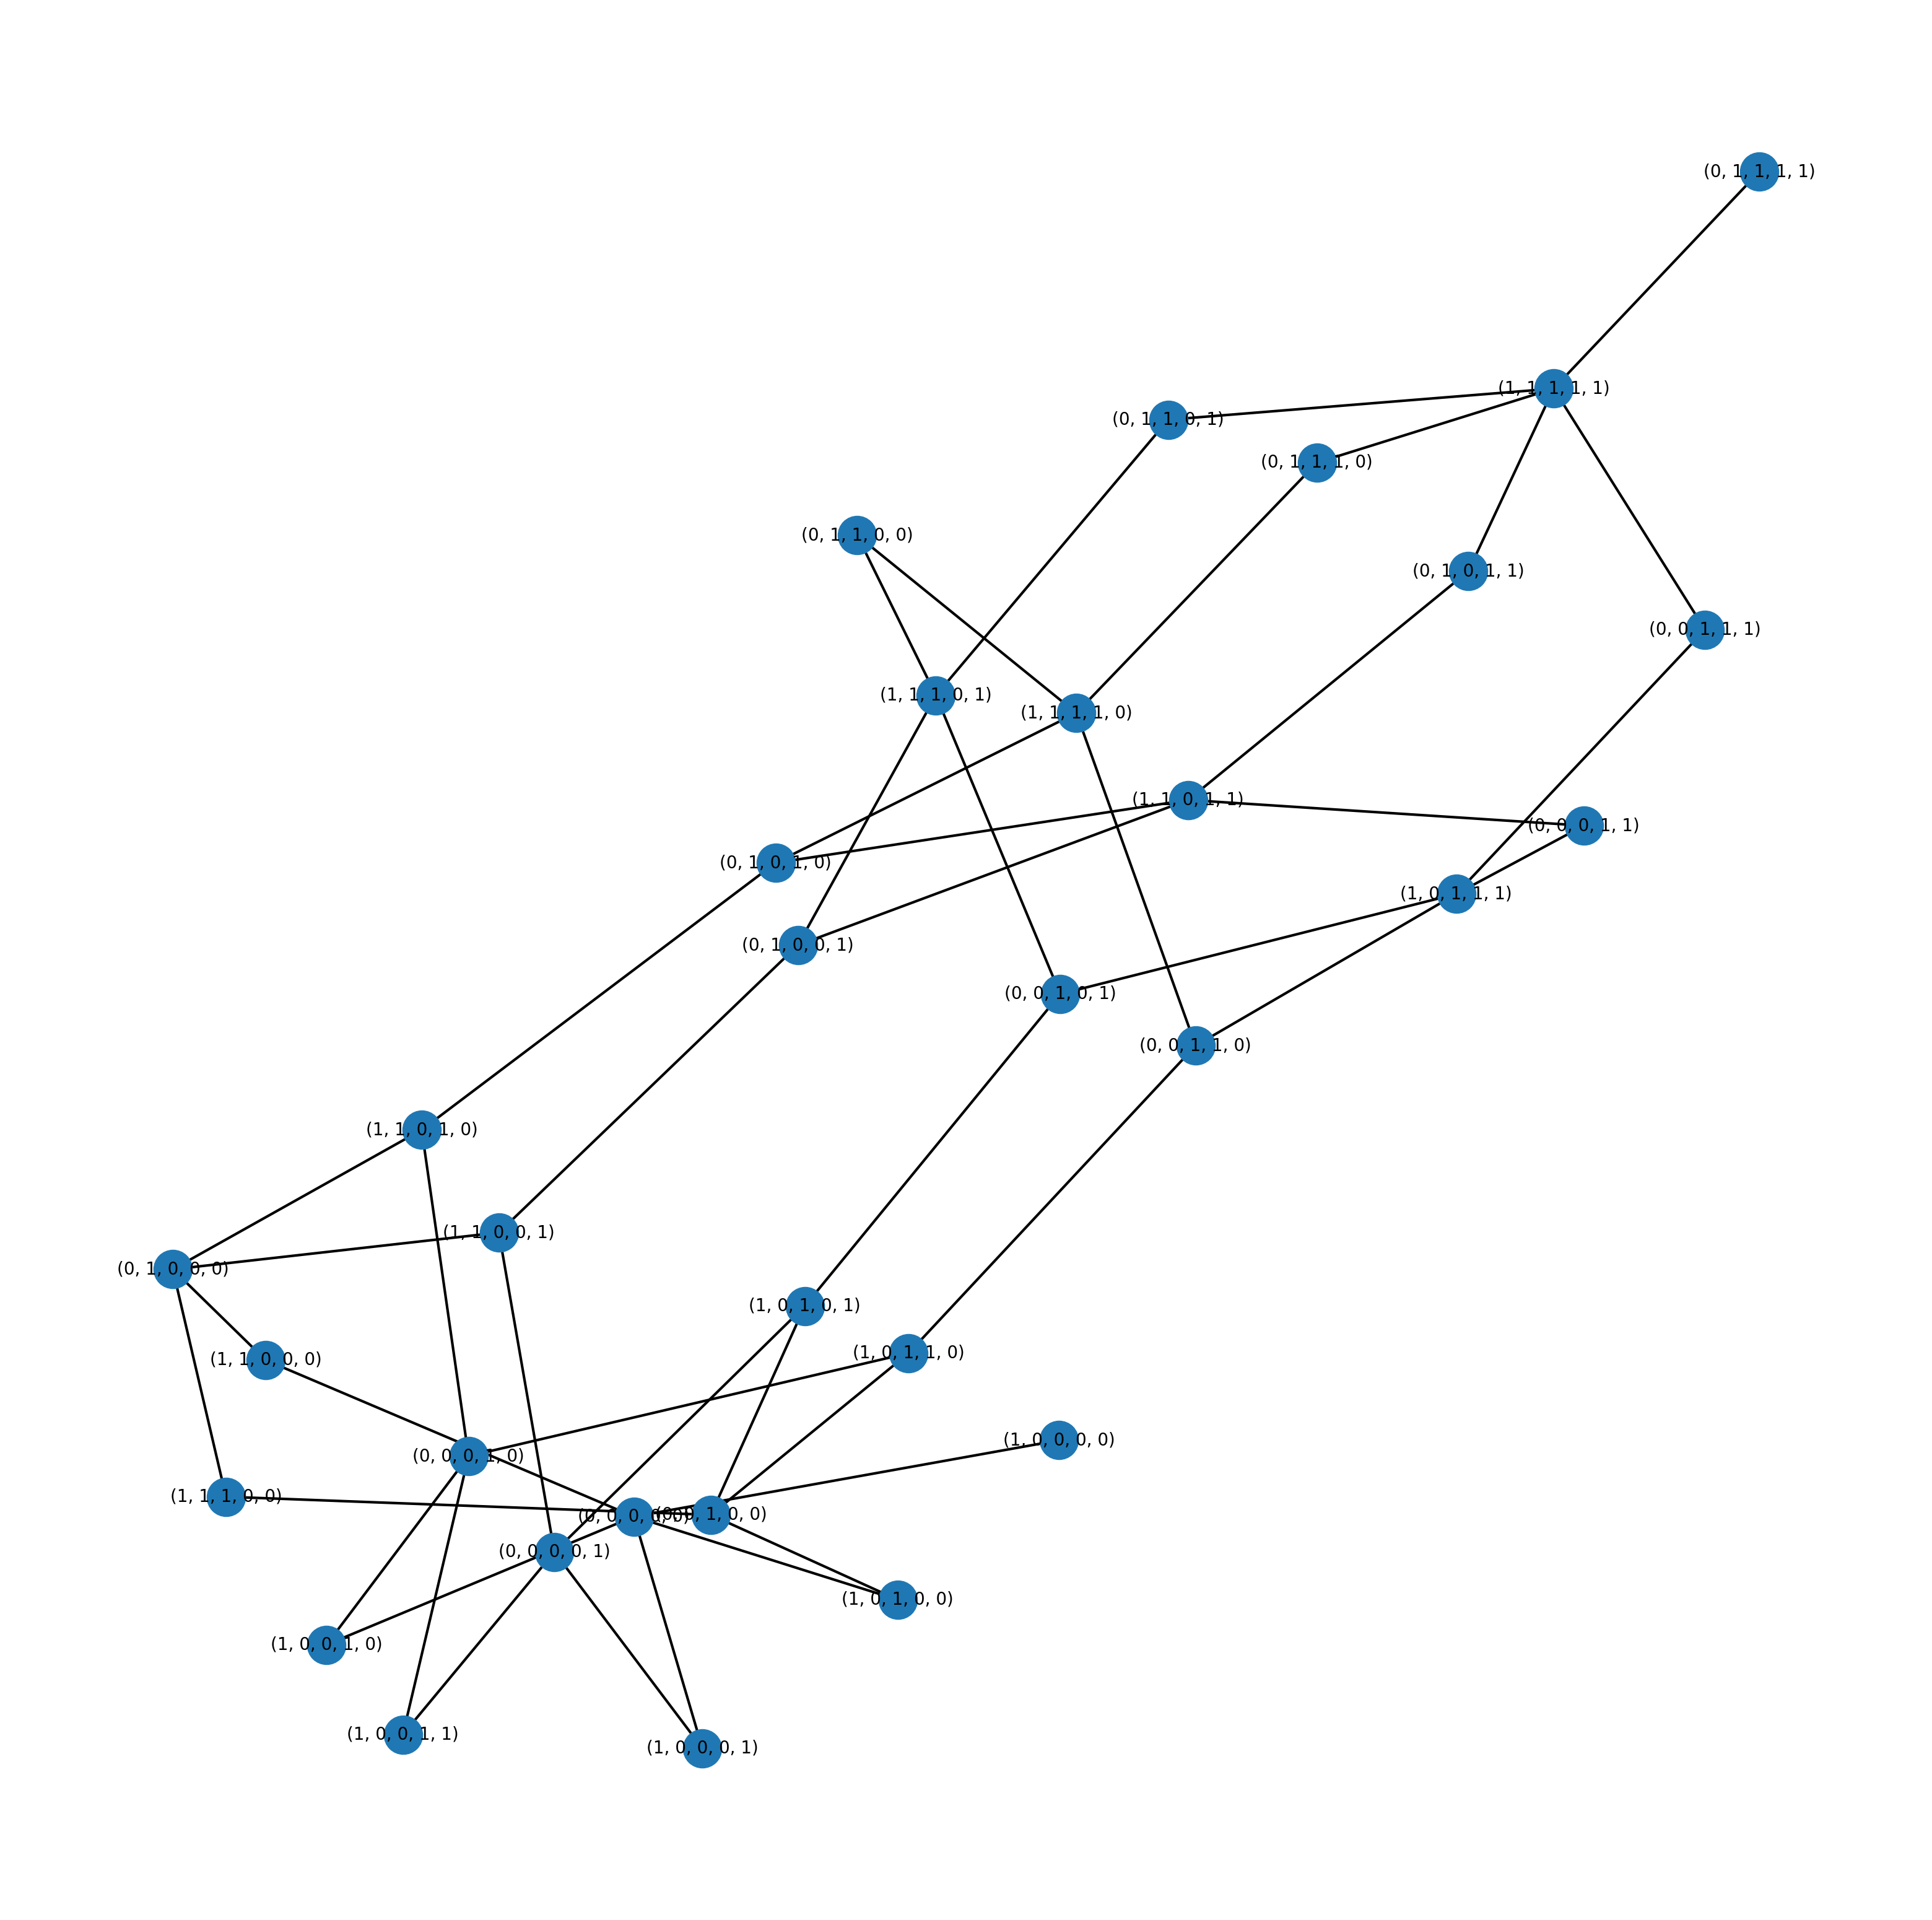

In [27]:
# Helper functions to display a Graph
def showbinarywgcgraph(graph):
    edgeDict = graph.all_edges()
    edgeList = []
    for node in edgeDict:
        if edgeDict[node] is not None:
            for neighbor, weight in edgeDict[node]:
                edgeList.append((node,neighbor, {'weight': 1}))

    G = nx.Graph()
    G.add_edges_from(edgeList)

    f = plt.figure(figsize = (40,40))
    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size = 2000)
    nx.draw_networkx_edges(G, pos, width = 3)
    nx.draw_networkx_labels(G, pos, font_size = 20)

    plt.axis("off")
    plt.show()
    
showbinarywgcgraph(wgcgraph2)

In [28]:
def breadth_first_search(graph, start, goal):
    ''' Function to perform BFS to find path in a graph
        Input  : Graph with the start and goal vertices
        Output : Dict of explored vertices in the graph
    '''
    frontier = queue.Queue()    # FIFO Queue for Frontier
    
    # initialization
    frontier.put(start)         # Add the start node to frontier
    explored = {}               # Dict of explored nodes {node : parentNode}
    explored[start] = None      # start node has no parent node
    processed = 0               # Count of total nodes processed
    
    while not frontier.empty():
        # get next node from frontier
        currentNode = frontier.get()
        processed += 1
        
        # stop when goal is reached
        if currentNode == goal:
            break
        print(currentNode)
        # explore every single neighbor of current node
        for nextNode, weight in graph.neighbors(currentNode):
           
            # ignore if it has already been explored
            if nextNode not in explored:
                # check for the cost of the node
                if nextNode not in explored and weight != float('inf'):
                        
                    # put new node in frontier
                    frontier.put(nextNode)

                    # assign current node as parent
                    explored[nextNode] = currentNode
                
                elif nextNode not in explored and weight == float('inf'): 
                    explored[nextNode] = []
                    
    return explored, processed


# Reconstruct the path from the Dict of explored nodes {node : parentNode}
# Intuition : Backtrack from the goal node by checking successive parents

def reconstruct_path(explored, start, goal):
    if goal not in explored:
        return None  # Return None if goal was not reached
    path = []
    currentNode = goal
    while currentNode != start:
        path.append(currentNode)
        if (currentNode in explored):
            currentNode = explored[currentNode]  # Use get to avoid KeyError
        else:
            return path
    path.append(start)
    path.reverse()
    return path

In [29]:
# Define start and goal positions
START = (0, 0, 0, 0, 0)
GOAL = (1, 1, 1, 1, 1)

# Run the BFS algorithm for path finding
nodesExplored, nodesProcessed = breadth_first_search(wgcgraph2, start=START, goal=GOAL)
path = reconstruct_path(nodesExplored, start=START, goal=GOAL)

print("Example to show no paths are found using a search algo\n")
print("Breadth-First-Search (BFS)\n")
print("Total nodes visited :", nodesProcessed, " | ", np.round(100 * (nodesProcessed / totalNodes), 2), "%")

if path is None:
    print("No valid path found.")
else:
    print("Final path nodes traversed :", len(path))
    print("\nFarmer's guide to cross the river :", path)

totalNodes = len(grid2)*len(grid2[0])

(0, 0, 0, 0, 0)
Example to show no paths are found using a search algo

Breadth-First-Search (BFS)

Total nodes visited : 1  |  6.25 %
No valid path found.
